<a href="https://colab.research.google.com/github/sidra007/ML-CLASSIFICATION/blob/main/Random__forest_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RANDOM FOREST CLASSIFIER**

IMPOTING LIBRARIES

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
######today's main librar
from sklearn.ensemble import RandomForestClassifier
#######
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
####### new libraries
from sklearn.model_selection import GridSearchCV,KFold,cross_val_predict

LOADING DATA

In [45]:
mushroom=pd.read_csv('/content/drive/My Drive/data/mushrooms.csv')
mushroom.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g
5,e,x,y,y,t,a,f,c,b,n,e,c,s,s,w,w,p,w,o,p,k,n,g
6,e,b,s,w,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,n,m
7,e,b,y,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,s,m
8,p,x,y,w,t,p,f,c,n,p,e,e,s,s,w,w,p,w,o,p,k,v,g
9,e,b,s,y,t,a,f,c,b,g,e,c,s,s,w,w,p,w,o,p,k,s,m


FINDING NO. OF ROWS AND COLUMNS OF DATA

In [46]:
mushroom.shape

(8124, 23)

FINDING IF THERE IS ANY NAN VALUE IN DATA 

In [47]:
mushroom.isna().sum(axis=0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

FINDING UNIQUE VALUES IN EACH COLUMN

In [48]:
for i in mushroom:
  print(f'{i} \t {mushroom[i].unique()}')

class 	 ['p' 'e']
cap-shape 	 ['x' 'b' 's' 'f' 'k' 'c']
cap-surface 	 ['s' 'y' 'f' 'g']
cap-color 	 ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
bruises 	 ['t' 'f']
odor 	 ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
gill-attachment 	 ['f' 'a']
gill-spacing 	 ['c' 'w']
gill-size 	 ['n' 'b']
gill-color 	 ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
stalk-shape 	 ['e' 't']
stalk-root 	 ['e' 'c' 'b' 'r' '?']
stalk-surface-above-ring 	 ['s' 'f' 'k' 'y']
stalk-surface-below-ring 	 ['s' 'f' 'y' 'k']
stalk-color-above-ring 	 ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
stalk-color-below-ring 	 ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
veil-type 	 ['p']
veil-color 	 ['w' 'n' 'o' 'y']
ring-number 	 ['o' 't' 'n']
ring-type 	 ['p' 'e' 'l' 'f' 'n']
spore-print-color 	 ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
population 	 ['s' 'n' 'a' 'v' 'y' 'c']
habitat 	 ['u' 'g' 'm' 'd' 'p' 'w' 'l']


IN "CAP_COLOR" COLUMN, FINDING HOW MANY TIMES A CERTAIN VALUE IS PRESENT

In [49]:
cap_color=mushroom['cap-color'].value_counts()
cap_color

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

CONVERTING "CAP_COLOR" 2nd COLUMN (i.e. of NO.OF VALUES) INTO LIST

In [50]:
m_height=cap_color.values.tolist()
m_height

[2284, 1840, 1500, 1072, 1040, 168, 144, 44, 16, 16]

CONVERTING "CAP_COLOR" 1st COLUMN (i.e. of COLORS) INTO LIST

In [51]:
cap_color.axes

[Index(['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r'], dtype='object')]

In [52]:
cap_color_label=cap_color.axes[0].tolist()
cap_color_label

['n', 'g', 'e', 'y', 'w', 'b', 'p', 'c', 'u', 'r']

DATA VISUALIZATION

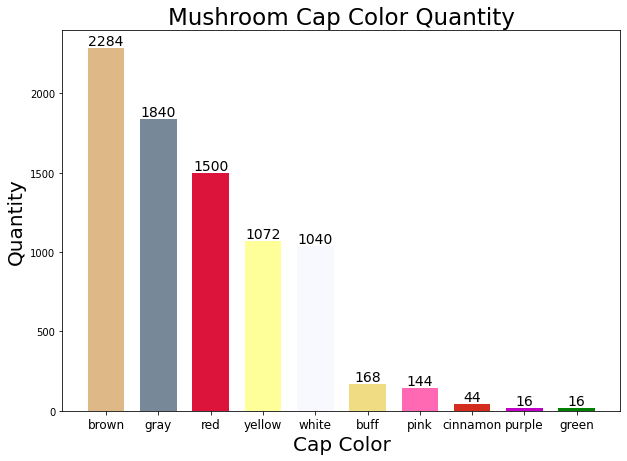

In [53]:
# PLOTTING PREPARATION

ind=np.arange(10)  # 10 because we have 10 values n,g,e,y,w,b,p,c,u,r
width=0.7
colors = ['#DEB887','#778899','#DC143C','#FFFF99','#f8f8ff','#F0DC82','#FF69B4','#D22D1E','#C000C5','g']
# respective color codes from google for n= brown(from uci mushroom dataset),g,e....
fig , ax = plt.subplots(figsize=(10,7))
mushroom_bars=ax.bar(ind,m_height,width,color=colors)


# DEFINING LABELS,TITLE AND AXIS TICKS

ax.set_xlabel('Cap Color',fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Mushroom Cap Color Quantity',fontsize=23)
ax.set_xticks(ind)
ax.set_xticklabels(('brown','gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                   fontsize=12)

#AUTO LABEL THE NO. OF MUSHROOM ON EACH BAR AT THE TOP OF BAR

def autolabel(rects,fontsize=14):
        for rect in rects:
          height = rect.get_height()
          ax.text(rect.get_x() + rect.get_width()/2., 1*height,'%d' % int(height),
                ha='center', va='bottom',fontsize=fontsize)
autolabel(mushroom_bars)        
plt.show()


VISUALIZING THROUGH BAR CHART HOW MANY IN EACH COLOR IS EDIBLE AND HOW MANY ARE POISONOUS

In [54]:
len(mushroom[(mushroom['cap-color']=='n') & (mushroom['class']=='e')].index)

1264

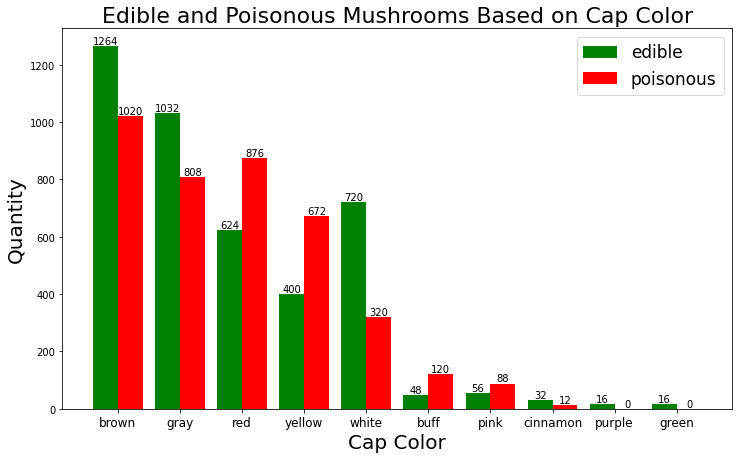

In [55]:
#FINDING EDIBLE AND POISONOUS MUSHROOM OF EACH COLOR
edible_cc=[]
poisonous_cc=[]

for color in cap_color_label:
  size=len(mushroom[mushroom['cap-color']==color].index)
  edible=len(mushroom[(mushroom['cap-color']==color) & (mushroom['class']=='e')].index)
  edible_cc.append(edible)
  poisonous_cc.append(size- edible)

# PLOTTING AS A BAR CHART
width=0.4
fig,ax = plt.subplots(figsize=(12,7))
edible_bars= ax.bar(ind,edible_cc,width,color='g')
poisonous_bars=ax.bar(ind+width,poisonous_cc,width,color='r')

# GIVING LABELS,TITLES AND TICKS
ax.set_xlabel("Cap Color",fontsize=20)
ax.set_ylabel('Quantity',fontsize=20)
ax.set_title('Edible and Poisonous Mushrooms Based on Cap Color',fontsize=22)
ax.set_xticks(ind + width / 2) #Positioning on the x axis
ax.set_xticklabels(('brown', 'gray','red','yellow','white','buff','pink','cinnamon','purple','green'),
                  fontsize = 12)
ax.legend((edible_bars,poisonous_bars),('edible','poisonous'),fontsize=17)
autolabel(edible_bars, 10)
autolabel(poisonous_bars, 10)
plt.show()





NOW DATA PREPROCESSING i.e. CONVERTING ALPHABETS TO NUMBERS 

In [56]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in mushroom.columns:
  mushroom[column]=label_encoder.fit_transform(mushroom[column])
    #in numerical                               #from textual

mushroom.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


ONCE AGAIN CHECKING IF THERE IS ANY MISSING VALUE

In [57]:
mushroom.isnull().sum(axis=0)

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

TARGET IS "CLASS" i.e. WHETHER MUSHROOM IS EDIBLE OR NOT EHILE REMAINING CLOUMNS ARE FEAURES

In [58]:
# important.finding how many are edible and how many is poisonous in a column
mushroom.groupby('class').size()

class
0    4208
1    3916
dtype: int64

FEATURES EXTRACTION

In [59]:
#features.Talking all columns and then dropping only class columns
x=mushroom
x=x.drop(columns=['class'])
x.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,0,2,1,0,3,0,1


In [60]:
#target
y=mushroom['class']
y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

PREPROCESSING: STANDARD SCALING

In [61]:
from sklearn.preprocessing import StandardScaler
stand_x=StandardScaler()
x=stand_x.fit_transform(x)

VISUALIZING IT INTO HISTOGRAM

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65636cc240>,
      dtype=object)

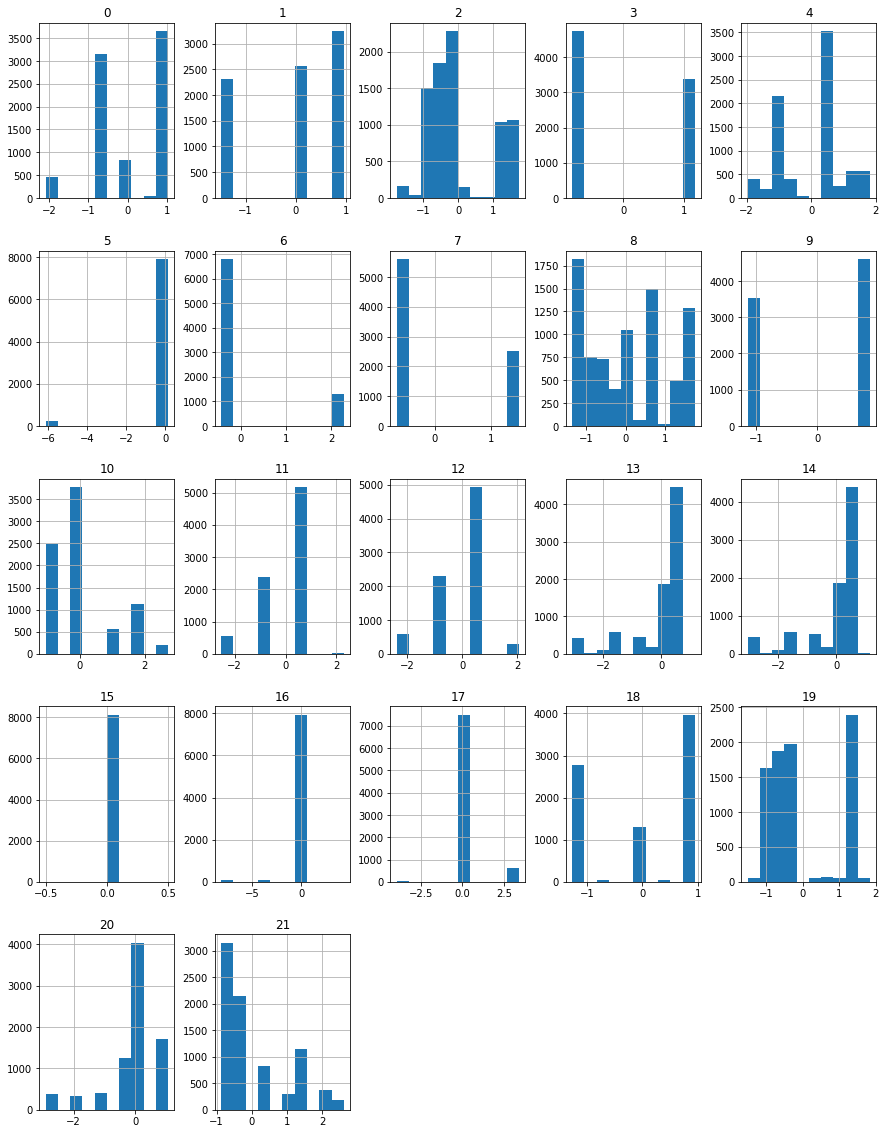

In [62]:
fig=plt.figure(figsize=(15,20))
ax=fig.gca()  #gca is creating fig axes
pd.DataFrame(x).hist(ax=ax)

SPILITING DATA INTO TRAIN AND TEST

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

FINDING OPTIMAL VALUE

In [64]:
## NOT RUNNING IT AS IT WILL TAKE LOTS OF TIME. FOR EASE WE WILL TAKE OPTIMAL VALUES AS:
#         max_depth=10
#         n_estimators=100
#         min_samples_leaf=1
"""
param_grid = {
    'max_depth': [1,5,10,15],
    'n_estimators' : [10,100,500,1000],
    'min_samples_leaf' : [1,2,3,4,5,10,15,20,30,40,50]
    }

grid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,max_features = 'sqrt'), param_grid=param_grid,cv=10)
grid_search.fit(x_train, y_train)

print(grid_search.best_params_)

optimal_estimators = grid_search.best_params_.get("n_estimators")
optimal_depth = grid_search.best_params_.get("max_depth")
optimal_leaf = grid_search.best_params_.get("min_samples_leaf")
"""

'\nparam_grid = {\n    \'max_depth\': [1,5,10,15],\n    \'n_estimators\' : [10,100,500,1000],\n    \'min_samples_leaf\' : [1,2,3,4,5,10,15,20,30,40,50]\n    }\n\ngrid_search = GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1,max_features = \'sqrt\'), param_grid=param_grid,cv=10)\ngrid_search.fit(x_train, y_train)\n\nprint(grid_search.best_params_)\n\noptimal_estimators = grid_search.best_params_.get("n_estimators")\noptimal_depth = grid_search.best_params_.get("max_depth")\noptimal_leaf = grid_search.best_params_.get("min_samples_leaf")\n'

TRAINING THE MODEL

In [65]:
## AS WE HAVE NOT RUN PREVIOUS CELL,THEREFORE. FOR EASE WE WILL TAKE OPTIMAL VALUES AS:
#         max_depth=10
#         n_estimators=100
#         min_samples_leaf=1

model = RandomForestClassifier(n_estimators=100, max_depth = 10,min_samples_leaf = 1)
k_fold = KFold(n_splits=10,random_state=123)
model.fit(x_train,y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

PREDICTION

In [66]:
predictions = cross_val_predict(model,x_test,y_test,cv=k_fold)


CONFUSION MATRIX(EVALUTION)

In [67]:
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))


[[820   0]
 [  0 805]]
1.0


VISUALIZING RANDOM FOREST

In [68]:
features = mushroom.drop(columns=['class'])
feature_cols = features.columns
feature_cols


Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [69]:
feature_cols = feature_cols.tolist()
feature_cols


['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

[Text(418.5, 518.8909090909091, 'X[18] <= 0.671\ngini = 0.498\nsamples = 4097\nvalue = [3474, 3025]'),
 Text(265.390243902439, 469.4727272727273, 'X[8] <= -0.37\ngini = 0.381\nsamples = 2034\nvalue = [813, 2364]'),
 Text(122.48780487804878, 420.05454545454546, 'X[10] <= 0.839\ngini = 0.179\nsamples = 1415\nvalue = [218, 1980]'),
 Text(81.65853658536585, 370.6363636363636, 'X[8] <= -1.218\ngini = 0.081\nsamples = 1326\nvalue = [87, 1980]'),
 Text(40.829268292682926, 321.21818181818185, 'gini = 0.0\nsamples = 844\nvalue = [0, 1312]'),
 Text(122.48780487804878, 321.21818181818185, 'X[11] <= -0.121\ngini = 0.204\nsamples = 482\nvalue = [87, 668]'),
 Text(81.65853658536585, 271.8, 'gini = 0.0\nsamples = 425\nvalue = [0, 668]'),
 Text(163.3170731707317, 271.8, 'gini = 0.0\nsamples = 57\nvalue = [87, 0]'),
 Text(163.3170731707317, 370.6363636363636, 'gini = 0.0\nsamples = 89\nvalue = [131, 0]'),
 Text(408.29268292682923, 420.05454545454546, 'X[6] <= 0.92\ngini = 0.477\nsamples = 619\nvalue = 

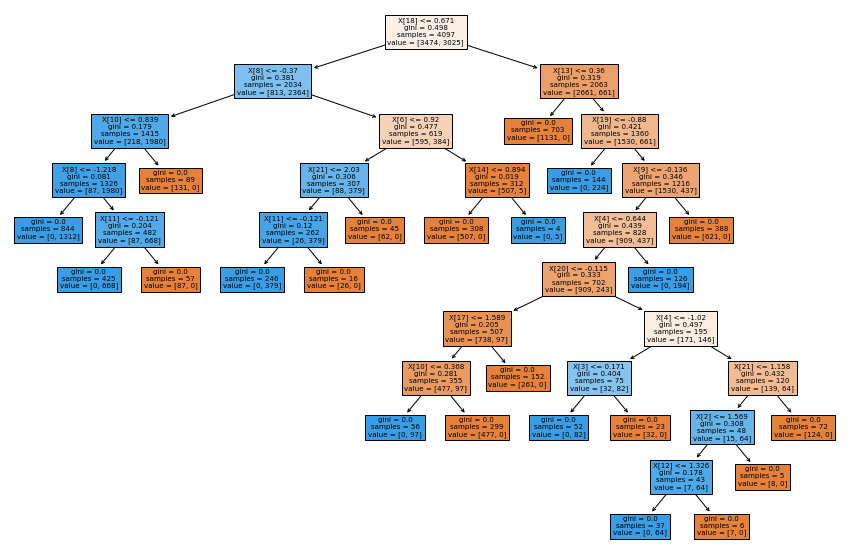

In [70]:
#For visualizing one tree for sample in random Forest
import sklearn.tree as tree 
plt.figure(figsize=(15,10))
tree.plot_tree(model.estimators_[0],filled=True)


In [ ]:
# For visualizing all trees in random Forest
for i in range(0,len(model.estimators_)):